In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style>')

In [2]:
import numpy as np

In [3]:
import GArDen.interfaces as garden
from GArDen.convert.sequence import SeqToPathGraph
from GArDen.transform.rna_structure import PathGraphToRNAPlfold

remap={'A0':'A','C0':'C','G0':'G','U0':'E','T0':'E',
       'A1':'V','C1':'S','G1':'Y','U1':'D','T1':'D'}

def remap_with_structure(pos_seqs, remap=remap):
    graphs = garden.transform(pos_seqs, program=SeqToPathGraph())
    graphs = garden.transform(graphs, program=PathGraphToRNAPlfold(max_num_edges=2,
                                                                   window_size=200,
                                                                   max_bp_span=100,
                                                                   hard_threshold=.5,
                                                                   avg_bp_prob_cutoff=.01))
    for graph in graphs:
        paireds = [graph.node[u]['label']+str(int(graph.node[u].get('paired',False))) for u in graph.nodes()]
        paireds = [remap[c] for c in paireds]
        seq = ''.join(paireds)
        yield ('ID',seq)
alphabet = 'protein'
color_scheme = 'chemistry'

In [4]:
def remap_with_structure(pos_seqs):
    for seq in pos_seqs:
        yield seq
alphabet = 'rna'
color_scheme = 'classic'

In [5]:
def filter_pvalue(iterable, threshold=2, less_than=False):
    for header,seq in iterable:
        val = float(header.split('_')[1])
        if less_than:
            if val < threshold:
                yield (header,seq)
        else:
            if val > threshold:
                yield (header,seq)

In [6]:
def filter_pvalue(iterable, threshold=2, less_than=False):
    for header,seq in iterable:
        val = float(header.split(';')[2])
        if less_than:
            if val < threshold:
                yield (header,seq)
        else:
            if val > threshold:
                yield (header,seq)

In [7]:
dir_name = '/Users/costa/Desktop/BTSync/DATA/RBP/'

In [8]:
!ls  $dir_name

AARS-human_K562_ENCSR825SVO_rep1_unique_ids_extlr60_context0.fa
AARS-human_K562_ENCSR825SVO_rep2_unique_ids_extlr60_context0.fa
AGGF1-human_HepG2_ENCSR543TPH_rep1_unique_ids_extlr60_context0.fa
AGGF1-human_HepG2_ENCSR543TPH_rep2_unique_ids_extlr60_context0.fa
AGGF1-human_K562_ENCSR725ARB_rep1_unique_ids_extlr60_context0.fa
AGGF1-human_K562_ENCSR725ARB_rep2_unique_ids_extlr60_context0.fa
AKAP8L-human_K562_ENCSR206RXT_rep1_unique_ids_extlr60_context0.fa
AKAP8L-human_K562_ENCSR206RXT_rep2_unique_ids_extlr60_context0.fa
AUH-human_HepG2_ENCSR334QFR_rep1_unique_ids_extlr60_context0.fa
AUH-human_HepG2_ENCSR334QFR_rep2_unique_ids_extlr60_context0.fa
AUH-human_K562_ENCSR541QHS_rep1_unique_ids_extlr60_context0.fa
AUH-human_K562_ENCSR541QHS_rep2_unique_ids_extlr60_context0.fa
BCCIP-human_HepG2_ENCSR485QCG_rep1_unique_ids_extlr60_context0.fa
BCCIP-human_HepG2_ENCSR485QCG_rep2_unique_ids_extlr60_context0.fa
BUD13-human_HepG2_ENCSR830BSQ_rep1_unique_ids_extlr60_context0.fa
BUD13-human_HepG2_ENCSR830

# SMoD

In [9]:
# good ones
name = 'HNRNPC-human_HepG2_ENCSR550DVK_rep1_unique_ids_extlr60_context0.fa'
name = 'HNRNPK-human_HepG2_ENCSR828ZID_rep1_unique_ids_extlr60_context0.fa'
name = 'KHDRBS1-human_K562_ENCSR628IDK_rep1_unique_ids_extlr60_context0.fa'
name = 'HNRNPA1-human_HepG2_ENCSR769UEW_rep1_unique_ids_extlr60_context0.fa'
name = 'PCBP2-human_HepG2_ENCSR339FUY_rep2_unique_ids_extlr60_context0.fa' #**
name = 'LIN28B-human_K562_ENCSR970NKP_rep2_unique_ids_extlr60_context0.fa'
name = 'GTF2F1-human_HepG2_ENCSR265ZIS_rep1_unique_ids_extlr60_context0.fa'
name = 'U2AF2-human_HepG2_ENCSR202BFN_rep1_unique_ids_extlr60_context0.fa'
name = 'QKI-human_HepG2_ENCSR570WLM_rep1_unique_ids_extlr60_context0.fa' #**
name = 'RBFOX2-human_HepG2_ENCSR987FTF_rep1_unique_ids_extlr60_context0.fa' #**
name = 'TAF15-human_HepG2_ENCSR841EQA_rep1_unique_ids_extlr60_context0.fa'
name = 'TARDBP-human_K562_ENCSR584TCR_rep1_unique_ids_extlr60_context0.fa' #***
name = 'U2AF2-human_K562_ENCSR893RAV_rep1_unique_ids_extlr60_context0.fa'
pos_fname = dir_name+name

In [10]:
name = 'IGF2BP3-human_HepG2_ENCSR993OLA_rep1_unique_ids_extlr60_context0.fa'
name = 'FMR1-human_K562_ENCSR331VNX_rep1_unique_ids_extlr60_context0.fa' #bad
name = 'RBM15-human_HepG2_ENCSR754NDA_rep1_unique_ids_extlr60_context0.fa'#?
name = 'TIA1-human_HepG2_ENCSR623VEQ_rep1_unique_ids_extlr60_context0.fa'
name = 'XRCC6-human_K562_ENCSR258QKO_rep1_unique_ids_extlr60_context0.fa'
name = 'ZRANB2-human_K562_ENCSR663NRA_rep2_unique_ids_extlr60_context0.fa'
name = 'ZNF622-human_K562_ENCSR657TZZ_rep2_unique_ids_extlr60_context0.fa'
name = 'YWHAG-human_K562_ENCSR867ZVK_rep2_unique_ids_extlr60_context0.fa'
name = 'YBX3-human_K562_ENCSR529FKI_rep2_unique_ids_extlr60_context0.fa'
name = 'TARDBP-human_K562_ENCSR584TCR_rep1_unique_ids_extlr60_context0.fa' #***


pos_fname = dir_name+name

In [11]:
complexity=5 #feature resolution
n_clusters=20 # maximal num of motives; tradeoff: if high -> small omogenous motives, if low -> few mixed motives
min_subarray_size = 5
max_subarray_size = 10
# merging parameters
similarity_th=0.5
min_score=5
min_freq=0.6
min_cluster_size=10
sample_size=400
#filtering parameters
display_th = 0.035 # minimum frequency of a consensus regex to be displayed
regex_th=0.25 # minimum frequency of a nt to be included in the consensus regex 
th_std = 25 # maximum std of localization of consensus regex within the sequence

In [12]:
desired_size=10000
min_diff=desired_size
for th in np.linspace(2.0, 5.5, num=15):
    from eden.converter.fasta import fasta_to_sequence
    pos_seqs = fasta_to_sequence(pos_fname)
    pos_seqs = filter_pvalue(pos_seqs,threshold=th)
    from eden.util import iterator_size
    num = iterator_size(pos_seqs)
    diff = abs(num-desired_size)
    if diff < min_diff:
        min_diff = diff
        min_th = th
    print 'fold_change_th: %.1f  selected seqs:%.6s  diff_to_desired: %.6s'%(th, num , diff)
th = min_th
print 'Selected threshold %.1f' % th

fold_change_th: 2.0  selected seqs:13173  diff_to_desired: 3173
fold_change_th: 2.2  selected seqs:10454  diff_to_desired: 454
fold_change_th: 2.5  selected seqs:8563  diff_to_desired: 1437
fold_change_th: 2.8  selected seqs:7228  diff_to_desired: 2772
fold_change_th: 3.0  selected seqs:5342  diff_to_desired: 4658
fold_change_th: 3.2  selected seqs:4060  diff_to_desired: 5940
fold_change_th: 3.5  selected seqs:3169  diff_to_desired: 6831
fold_change_th: 3.8  selected seqs:2513  diff_to_desired: 7487
fold_change_th: 4.0  selected seqs:1909  diff_to_desired: 8091
fold_change_th: 4.2  selected seqs:1383  diff_to_desired: 8617
fold_change_th: 4.5  selected seqs:1017  diff_to_desired: 8983
fold_change_th: 4.8  selected seqs:741  diff_to_desired: 9259
fold_change_th: 5.0  selected seqs:541  diff_to_desired: 9459
fold_change_th: 5.2  selected seqs:380  diff_to_desired: 9620
fold_change_th: 5.5  selected seqs:264  diff_to_desired: 9736
Selected threshold 2.2


In [13]:
%%time
from eden.converter.fasta import fasta_to_sequence
all_seqs = list(fasta_to_sequence(pos_fname))

from eden.converter.fasta import fasta_to_sequence
pos_seqs = fasta_to_sequence(pos_fname)
pos_seqs = filter_pvalue(pos_seqs,threshold=th)
pos_seqs = remap_with_structure(pos_seqs)
pos_seqs=list(pos_seqs)

#neg_seqs = fasta_to_sequence(neg_fname)
from eden.converter.fasta import fasta_to_sequence
neg_seqs = fasta_to_sequence(pos_fname)
neg_seqs = filter_pvalue(neg_seqs,threshold=th)
neg_seqs = remap_with_structure(neg_seqs)
from eden.modifier.seq import seq_to_seq, shuffle_modifier
neg_seqs = seq_to_seq(neg_seqs, modifier=shuffle_modifier, times=2, order=1)
neg_seqs_ord1 = list(neg_seqs)

from eden.converter.fasta import fasta_to_sequence
neg_seqs = fasta_to_sequence(pos_fname)
neg_seqs = filter_pvalue(neg_seqs,threshold=th)
neg_seqs = remap_with_structure(neg_seqs)
from eden.modifier.seq import seq_to_seq, shuffle_modifier
neg_seqs = seq_to_seq(neg_seqs, modifier=shuffle_modifier, times=1, order=2)
neg_seqs_ord2 = list(neg_seqs)

neg_seqs = neg_seqs_ord1 + neg_seqs_ord2

pos_size = len(pos_seqs)
train_pos_seqs = pos_seqs[:pos_size/2]
test_pos_seqs = pos_seqs[pos_size/2:]

neg_size = len(neg_seqs)
train_neg_seqs = neg_seqs[:neg_size/2]
test_neg_seqs = neg_seqs[neg_size/2:]

pos_block_size = pos_size / 16
neg_block_size = neg_size / 16

CPU times: user 4.88 s, sys: 42.6 ms, total: 4.92 s
Wall time: 4.94 s


In [14]:
from eden.sequence_motif_decomposer import SequenceMotifDecomposer as SMoD
smod=SMoD(complexity=complexity,
          n_clusters=n_clusters,
          min_subarray_size=min_subarray_size,
          max_subarray_size=max_subarray_size,
          pos_block_size=pos_block_size,
          neg_block_size=neg_block_size)

In [15]:
%%time
smod = smod.fit(train_pos_seqs, train_neg_seqs)
#smod.performance(test_pos_seqs, test_neg_seqs)

Setup 0.80 secs
Fitting
0 (653, 32769) (93.27 secs) (delta: 93.27)
1 (653, 32769) (93.71 secs) (delta: 0.43)
2 (653, 32769) (93.92 secs) (delta: 0.21)
3 (653, 32769) (93.95 secs) (delta: 0.04)
4 (653, 32769) (94.04 secs) (delta: 0.08)
5 (653, 32769) (94.47 secs) (delta: 0.43)
6 (653, 32769) (94.50 secs) (delta: 0.03)
7 (653, 32769) (94.52 secs) (delta: 0.02)
CPU times: user 1.07 s, sys: 541 ms, total: 1.61 s
Wall time: 1min 35s


In [16]:
%%time
orig_clusters = smod.predict(test_pos_seqs)

Setup 0.38 secs
Annotating
0 (88.26 secs) (delta: 88.26)
1 (88.47 secs) (delta: 0.20)
2 (88.47 secs) (delta: 0.00)
3 (88.47 secs) (delta: 0.00)
4 (88.47 secs) (delta: 0.00)
5 (88.47 secs) (delta: 0.00)
6 (88.54 secs) (delta: 0.07)
7 (88.54 secs) (delta: 0.00)
Setup 0.32 secs
Vectorizing
0 (653, 32769) (1.18 secs) (delta: 1.18)
1 (653, 32769) (1.33 secs) (delta: 0.15)
2 (653, 32769) (1.43 secs) (delta: 0.09)
3 (653, 32769) (1.52 secs) (delta: 0.10)
4 (653, 32769) (1.62 secs) (delta: 0.10)
5 (653, 32769) (1.72 secs) (delta: 0.10)
6 (653, 32769) (1.83 secs) (delta: 0.11)
7 (653, 32769) (1.93 secs) (delta: 0.10)
8 (653, 32769) (2.02 secs) (delta: 0.09)
Clustering
working on 5877 instances
...done  in 0.59 secs
CPU times: user 2.34 s, sys: 256 ms, total: 2.6 s
Wall time: 1min 32s


In [17]:
%%time
motives = smod.merge(orig_clusters, 
                     similarity_th=similarity_th,
                     min_score=min_score,
                     min_freq=min_freq,
                     min_cluster_size=min_cluster_size,
                     regex_th=regex_th,
                     sample_size=sample_size)
print '# motives:',len(motives)

Alignment
Cluster 0 (#150) (0.22 secs)
Cluster 1 (#328) (0.42 secs)
Cluster 2 (#125) (0.09 secs)
Cluster 3 (#352) (0.87 secs)
Cluster 4 (#207) (0.32 secs)
Cluster 5 (#253) (0.44 secs)
Cluster 6 (#307) (0.56 secs)
Cluster 7 (#252) (0.24 secs)
Cluster 10 (#196) (0.26 secs)
Cluster 11 (#481) (0.06 secs)
Cluster 12 (#986) (0.08 secs)
Cluster 13 (#190) (0.25 secs)
Cluster 14 (#213) (0.38 secs)
Cluster 15 (#314) (0.72 secs)
Cluster 16 (#318) (0.73 secs)
Cluster 17 (#247) (0.49 secs)
Joining: 11 (#481), 16 (#318) score: 1.00 deleting: 16  [11 is now #799]
Joining: 7 (#252), 12 (#986) score: 0.86 deleting: 12  [7 is now #1238]
Joining: 6 (#307), 7 (#1238) score: 0.86 deleting: 7  [6 is now #1545]
Joining: 2 (#125), 14 (#213) score: 0.86 deleting: 14  [2 is now #338]
Joining: 1 (#328), 11 (#799) score: 0.84 deleting: 11  [1 is now #1127]
Joining: 5 (#253), 10 (#196) score: 0.75 deleting: 10  [5 is now #449]
Joining: 4 (#207), 17 (#247) score: 0.75 deleting: 17  [4 is now #454]
Joining: 0 (#150)

In [18]:
%%time
motives = smod.quality_filter(all_seqs,
                              motives,
                              freq_threshold=None, #display_th,
                              std_threshold=None) #th_std)    
print '# motives:',len(motives)

# motives: 3
CPU times: user 1.22 s, sys: 6.6 ms, total: 1.23 s
Wall time: 1.23 s


Cluster id: 1  (# seqs: 3913) cons: UGUGUGUG  regex: UGUGUGUG


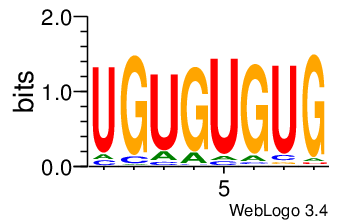

# occurrences or regex seq: 7621  freq:0.22
loc:37.0 +- 21.0


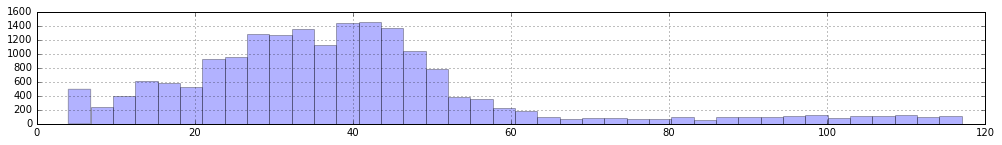

Clust 1 vs clust 0 (# 144)


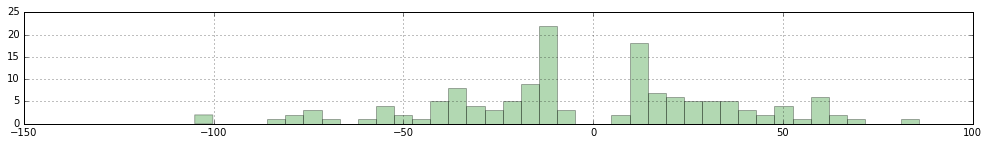

Clust 1 vs clust 3 (# 226)


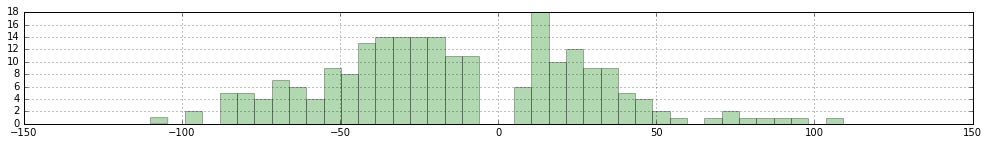

Cluster id: 0  (# seqs: 464) cons: GAAUGAAU  regex: GAAUGAAU


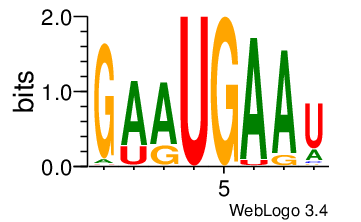

# occurrences or regex seq: 1148  freq:0.03
loc:40.0 +- 18.5


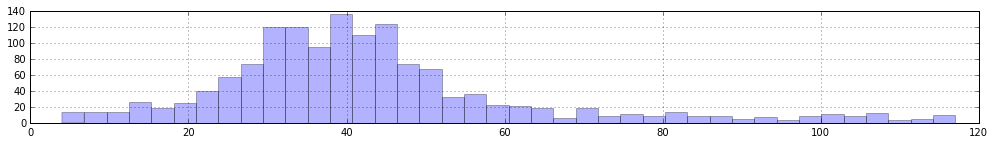

Clust 0 vs clust 1 (# 144)


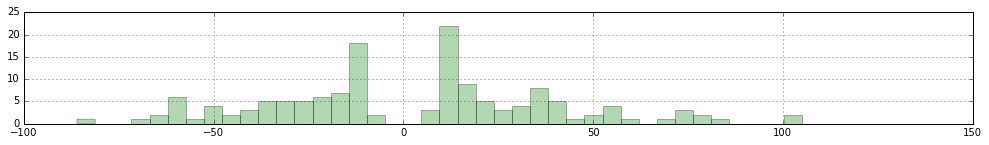

Clust 0 vs clust 3 (# 35)


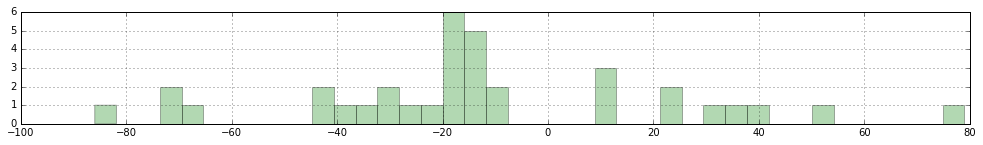

Cluster id: 3  (# seqs: 542) cons: CCUGCCUG  regex: (C|G)CUGCCUG


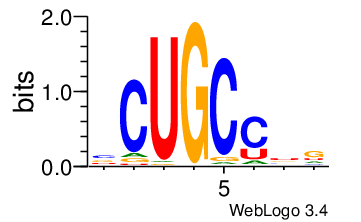

# occurrences or regex seq: 323  freq:0.01
loc:59.0 +- 60.0


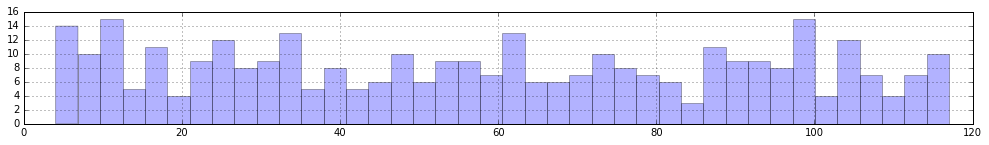

Clust 3 vs clust 0 (# 35)


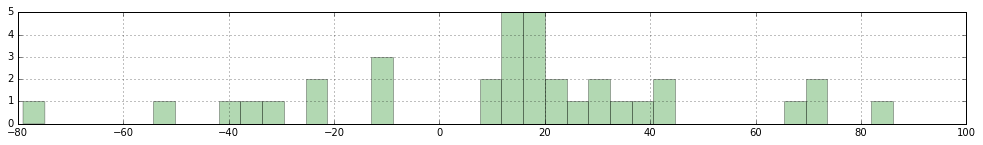

Clust 3 vs clust 1 (# 226)


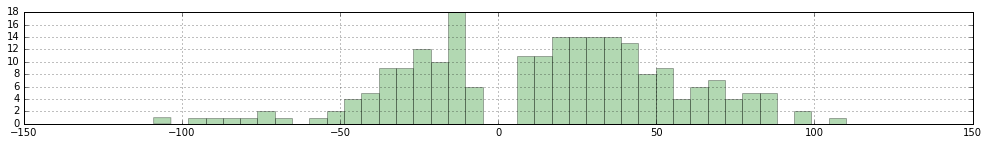

In [19]:
smod.report(all_seqs, motives)

---

In [20]:
###### identify exact occurrence of user defined sequence in pos seqs
def col_red(text):
    return "\x1b[31;1m"+str(text)+"\x1b[0m"
def col_green(text):
    return "\x1b[32;1m"+str(text)+"\x1b[0m"
def col_yellow(text):
    return "\x1b[33;1m"+str(text)+"\x1b[0m"
def col_blue(text):
    return "\x1b[34;1m"+str(text)+"\x1b[0m"
def col_magenta(text):
    return "\x1b[35;1m"+str(text)+"\x1b[0m"
def col_cyan(text):
    return "\x1b[36;1m"+str(text)+"\x1b[0m"


def split_occurrences(needle, haystack, no_header=True, n_max=200):
    i = 0
    for h,s in haystack:
        delim=col_yellow(needle)
        #delim=' '
        sp = re.split(needle, s, overlapped=True)
        counts = len(sp)-1
        if counts != 0:
            i += 1
            if no_header is False:
                print col_green(counts), col_cyan(h)
            seq = delim.join(sp)
            print seq
        if i > n_max:
            break

needle = 'CCUGG'
n_occ = num_occurrences(needle, all_seqs)
print 'Exact pattern %s occurs %d times in %d seqs (%.2f)' % (needle,n_occ , len(all_seqs), float(n_occ)/len(all_seqs))
plot_location(needle, all_seqs, nbins=40, size=(17,2))
split_occurrences(needle, all_seqs, n_max=500)

NameError: name 'num_occurrences' is not defined

---